## Continuing on last week's work
This week, I'm also using the LSTM and Linear Regression combined to predict the close price. 

### Stacked LSTM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

from pandas_datareader.data import DataReader

symbols = ["AAPL", "MSFT", "GOOG", "AMZN", "FB"]

stop = datetime.now()
start = datetime(stop.year-1, stop.month, stop.day)

for symbol in symbols:
    globals()[symbol] = DataReader(symbol, 'yahoo', start, stop)

Text(0.5, 1.0, 'AAPL Adj Close')

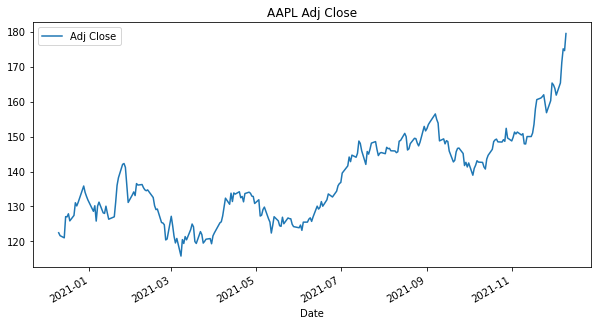

In [2]:
AAPL['Adj Close'].plot(legend = 1, figsize=(10,5))
plt.title('AAPL Adj Close')

Text(0.5, 1.0, 'MSFT Adj Close')

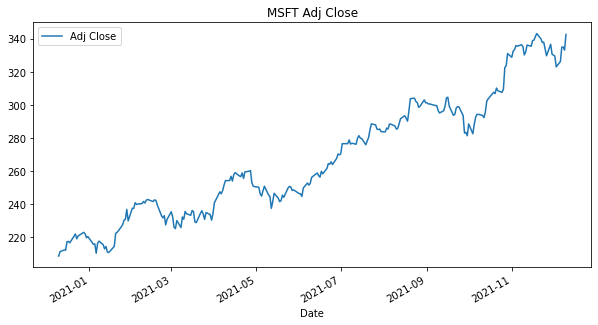

In [3]:
MSFT['Adj Close'].plot(legend = 1, figsize=(10,5))
plt.title('MSFT Adj Close')

Text(0.5, 1.0, 'GOOG Adj Close')

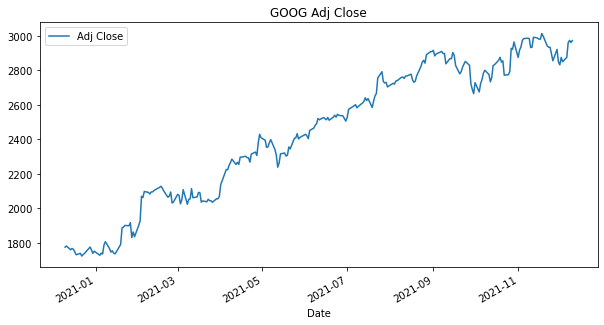

In [4]:
GOOG['Adj Close'].plot(legend = 1, figsize=(10,5))
plt.title('GOOG Adj Close')

Text(0.5, 1.0, 'AMZN Adj Close')

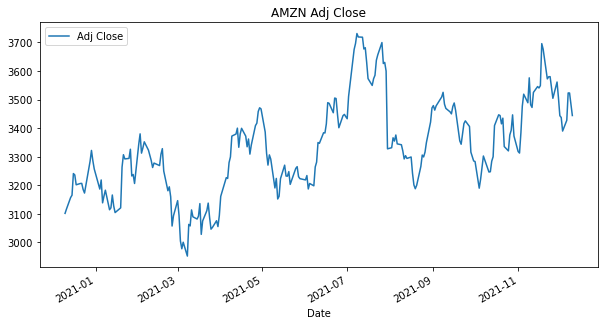

In [5]:
AMZN['Adj Close'].plot(legend = 1, figsize=(10,5))
plt.title('AMZN Adj Close')

Text(0.5, 1.0, 'FB Adj Close')

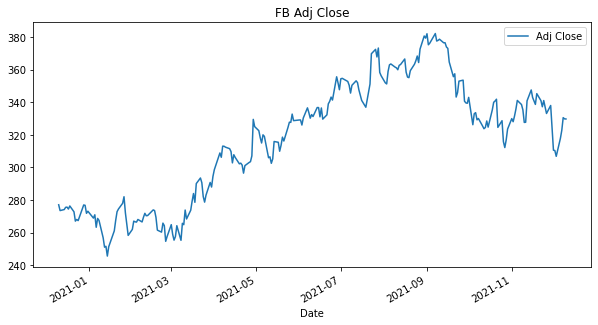

In [6]:
FB['Adj Close'].plot(legend = 1, figsize=(10,5))
plt.title('FB Adj Close')

In [7]:
import pandas_datareader as pdr

api_key = '37433789a0630adbec1815961d663c4c75b69e6c'

In [8]:
stock = 'AAPL'
df = pdr.get_data_tiingo(stock, api_key=api_key)

In [9]:
df.head()

close    high      low    open    volume  \
symbol date                                                                   
AAPL   2016-12-12 00:00:00+00:00  113.30  115.00  112.490  113.29  26374377   
       2016-12-13 00:00:00+00:00  115.19  115.92  113.750  113.84  43733811   
       2016-12-14 00:00:00+00:00  115.19  116.20  114.980  115.04  34031834   
       2016-12-15 00:00:00+00:00  115.82  116.73  115.230  115.38  46524544   
       2016-12-16 00:00:00+00:00  115.97  116.50  115.645  116.47  44351134   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2016-12-12 00:00:00+00:00  26.658606  27.058603  26.468019  26.656253   
       2016-12-13 00:00:00+00:00  27.103308  27.275071  26.764487  26.785664   
       2016-12-14 00:00:00+00:00  27.103308  27.340953  27.053897  27.068014   
       2016-12-15 00:00:00+00:00  27.251542  27.465658  27.112720  27.148014   
       2016-12-16 00:00:00+00:00  27.286836  27.411541  27.210366  27.404482   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2016-12-12 00:00:00+00:00  105497508      0.0          1.0  
       2016-12-13 00:00:00+00:00  174935244      0.0          1.0  
       2016-12-14 00:00:00+00:00  136127336      0.0          1.0  
       2016-12-15 00:00:00+00:00  186098176      0.0          1.0  
       2016-12-16 00:00:00+00:00  177404536      0.0          1.0

In [10]:
close_price = df.reset_index()['close']

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
close_price = scaler.fit_transform(np.array(close_price).reshape(-1,1))

close_price

array([[0.01618034],
       [0.02091421],
       [0.02091421],
       ...,
       [0.17092048],
       [0.16961803],
       [0.181866  ]])

In [12]:
training_size = int(len(close_price)*.65)
test_size = len(close_price) - training_size
train_data = close_price[0:training_size,:]
test_data = close_price[training_size:len(close_price),:1]

In [13]:
def create_dataset(dataset, time_step = 1):
    datax, datay = [], []
    for i in range(len(dataset) - time_step -1):
        a = dataset[i:(i+time_step), 0]
        datax.append(a)
        datay.append(dataset[i + time_step, 0])
    return np.array(datax), np.array(datay)

#train test split
time_step = 100 #number of features
train_x, train_y = create_dataset(train_data, time_step)
test_x, test_y = create_dataset(test_data, time_step)

In [14]:
train_x = train_x.reshape(train_x.shape[0],train_x.shape[1] , 1)
test_x = test_x.reshape(test_x.shape[0],test_x.shape[1] , 1)

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) 
model.add(LSTM(50,return_sequences=True))#stacked
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 98ms/step - loss: 0.0147 - val_loss: 0.0186
Epoch 2/100
12/12 [==============================] - 0s 27ms/step - loss: 0.0047 - val_loss: 0.0261
Epoch 3/100
12/12 [==============================] - 0s 21ms/step - loss: 0.0020 - val_loss: 0.0188
Epoch 4/100
12/12 [==============================] - 0s 19ms/step - loss: 8.7739e-04 - val_loss: 0.0215
Epoch 5/100
12/12 [==============================] - 0s 20ms/step - loss: 7.1323e-04 - val_loss: 0.0237
Epoch 6/100
12/12 [==============================] - 0s 20ms/step - loss: 7.1136e-04 - val_loss: 0.0206
Epoch 7/100
12/12 [==============================] - 0s 20ms/step - loss: 7.3024e-04 - val_loss: 0.0191
Epoch 8/100
12/12 [==============================] - 0s 19ms/step - loss: 6.9913e-04 - val_loss: 0.0189
Epoch 9/100
12/12 [==============================] - 0s 20ms/step - loss: 7.0234e-04 - val_loss: 0.0182
Epoch 10/100
12/12 [==============================] - 0s 19ms/step - loss: 6

In [17]:
train_predict = model.predict(train_x)
test_predict = model.predict(test_x)

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

import math

from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(train_y,train_predict))

203.93703819764195

In [18]:
math.sqrt(mean_squared_error(test_y,test_predict))

174.70062053381758

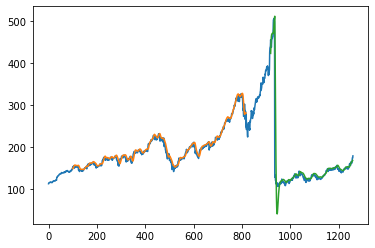

In [19]:
look_back=100
trainPredictPlot = np.empty_like(close_price)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(close_price)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_price) - 1, :] = test_predict

plt.plot(scaler.inverse_transform(close_price))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [20]:
from numpy import array

num = len(test_data) - 100

x_input = test_data[num:].reshape(1,-1)
x_input.shape #check

(1, 100)

In [21]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist() 

In [22]:
lst_output = []
n_steps = 100
i = 0
while(i < 7):
    
    if(len(temp_input) > 100):

        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        y_pred = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,y_pred))
        temp_input.extend(y_pred[0].tolist())
        temp_input = temp_input[1:]
        
        lst_output.extend(y_pred.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        y_pred = model.predict(x_input, verbose=0)
        print(y_pred[0])
        temp_input.extend(y_pred[0].tolist())
        print(len(temp_input))

        lst_output.extend(y_pred.tolist()) 
        i = i + 1
    

print(lst_output)

[0.16481552]
101
1 day input [0.10449593 0.10557295 0.10001252 0.09552912 0.09718222 0.09773325
 0.09688165 0.10149029 0.10046337 0.10073889 0.09843456 0.09830933
 0.09708203 0.09773325 0.10532248 0.10584847 0.11090795 0.10857858
 0.0989856  0.09983719 0.10356919 0.10737633 0.10715091 0.10399499
 0.10194114 0.10459612 0.11591735 0.11268629 0.11438948 0.11724483
 0.11887289 0.12485911 0.12090169 0.11829681 0.10552286 0.10697558
 0.10339386 0.10567314 0.10507201 0.09823419 0.09041954 0.09164684
 0.0977082  0.10016281 0.10038823 0.09650595 0.0878397  0.09014402
 0.08681277 0.08969317 0.08090169 0.08583594 0.08806512 0.09129618
 0.09031935 0.09009393 0.08683782 0.085335   0.09247339 0.09517846
 0.09946149 0.10499687 0.10624922 0.10680025 0.10482154 0.10469631
 0.1063995  0.10522229 0.11453976 0.10760175 0.10549781 0.10815279
 0.11183469 0.1105072  0.1113087  0.10920476 0.1101315  0.10289292
 0.10276769 0.10807765 0.10810269 0.11060739 0.11684408 0.12781465
 0.13452724 0.13570445 0.13668128

In [23]:
new_day = np.arange(1,101)
prediction_day = np.arange(101,108)

len(close_price)

1259

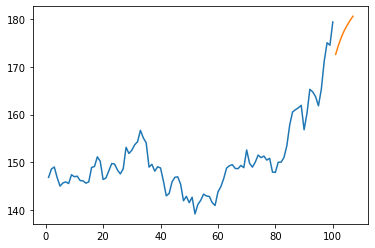

In [24]:
num = len(close_price) - 100

plt.plot(new_day,scaler.inverse_transform(close_price[num:]))
plt.plot(prediction_day,scaler.inverse_transform(lst_output))

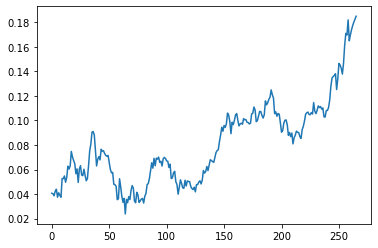

In [25]:
predict = close_price.tolist()
predict.extend(lst_output) #adding output to end
plt.plot(predict[1000:])

### Linear Regression
Just like what I did in the previous week.

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

symbols = ["AAPL", "MSFT", "GOOG", "AMZN", "FB"]

predicted_list = []
latest_close_list = []

for symbol in symbols:
    # Download data
    data_1d = yf.download(symbol, start="2016-01-01", end="2021-12-03")

    # Preprocess data
    tmp = data_1d[["Adj Close"]]
    tmp["mean_5"] = tmp["Adj Close"].shift(1).rolling(window=5).mean()
    tmp["mean_10"] = tmp["Adj Close"].shift(1).rolling(window=10).mean()
    tmp = tmp.dropna()
    x = tmp[["mean_5", "mean_10"]]
    y = tmp[["Adj Close"]]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

    # Apply model
    model = LinearRegression()
    model.fit(x_train, y_train)

    # Use model to predict 
    tmp = data_1d[["Adj Close"]][-10:]
    tmp.loc[tmp.shape[0]] = [0]
    tmp["mean_5"] = tmp["Adj Close"].shift(1).rolling(window=5).mean()
    tmp["mean_10"] = tmp["Adj Close"].shift(1).rolling(window=10).mean()
    tmp = tmp.dropna()
    tmp = tmp[["mean_5", "mean_10"]]

    predicted = float(model.predict(tmp))
    predicted_list.append(predicted)
    latest_close = float(data_1d["Adj Close"][-1:])
    latest_close_list.append(latest_close)

In [27]:
predicted_change_list = []
percent_change_list = []
print("Predicted adjusted close price:")
for i, symbol in enumerate(symbols):
    predicted_change_list.append( predicted_list[i] - latest_close_list[i] )
    percent_change_list.append(predicted_change_list[i] / latest_close_list[i])
    print(
        f"{symbol}: {predicted_list[i]} - Predicted change: {round(predicted_change_list[i], 3)} ({round(percent_change_list[i], 4)}%)"
        )

Predicted adjusted close price:
AAPL: 162.91316859316845 - Predicted change: -0.847 (-0.0052%)
MSFT: 330.29191023602664 - Predicted change: 0.802 (0.0024%)
GOOG: 2855.794238933037 - Predicted change: -19.736 (-0.0069%)
AMZN: 3468.651104449964 - Predicted change: 31.291 (0.0091%)
FB: 320.21876770436654 - Predicted change: 9.829 (0.0317%)


## Decision
Unfortunally, the game closed before Friday so I wasn't able to trade for this week, but here are what I would buy if I was able to do so.

**Result (Buy):**

| Symbol | QTY | Purchase Price | Close Price |
| :--- | :---  | :--- | :---  |
| MSFT | 1 | 339.42 | 342.54 |
| FB | 1 | 328.37 | 329.75 |
| AAPL | 3 | 176.08 | 179.45 |